In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Load the data

In [ ]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('data.txt', sep = ';')
dataset = pd_dat.values

In [ ]:
pd_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temperature of patient            120 non-null    float64
 1   Occurrence of nausea              120 non-null    int64  
 2   Lumbar pain                       120 non-null    int64  
 3   Urine pushing                     120 non-null    int64  
 4   Micturition pains                 120 non-null    int64  
 5   Burning/itch of urethra           120 non-null    int64  
 6   Inflammation of urinary bladder   120 non-null    int64  
 7   Nephritis of renal pelvis origin  120 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 7.6 KB


In [ ]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [ ]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

#### Build the model

In [ ]:
# Build the input layers
from tensorflow.keras import Input, layers

input_shape = (1, )
temperature = Input(shape = input_shape, name = 'temp')
nausea_occr = Input(shape = input_shape, name = 'nocc')
lumbar_pain = Input(shape = input_shape, name = 'lumbp')
urn_pushing = Input(shape = input_shape, name = 'up')
mctrtn_pain = Input(shape = input_shape, name = 'mict')
bis         = Input(shape = input_shape, name = 'bis')

# Create a list to represent all inputs
list_inputs = [temperature, nausea_occr, lumbar_pain,
                        urn_pushing, mctrtn_pain, bis
              ]

In [ ]:
# Merge all input features into a single large vector

X = layers.concatenate(list_inputs)

In [ ]:
from tensorflow.keras import activations
# Use a logistic regression classifier for disease prediction
# classification problem -> activation: sigmoid
pred_inflammation = layers.Dense(1, 
                                 activation = activations.sigmoid,
                                 name = 'inflam'
                                 )(X)
pred_nephritis = layers.Dense(1,
                              activation = activations.sigmoid,
                              name = 'nephr'
                              )(X)

# Create list to represent all outputs (predictions)
list_outputs = [pred_inflammation, pred_nephritis]

In [ ]:
# Create the model object
from tensorflow.keras import Model

model = Model(inputs = list_inputs,
              outputs = list_outputs)

#### Plot the model

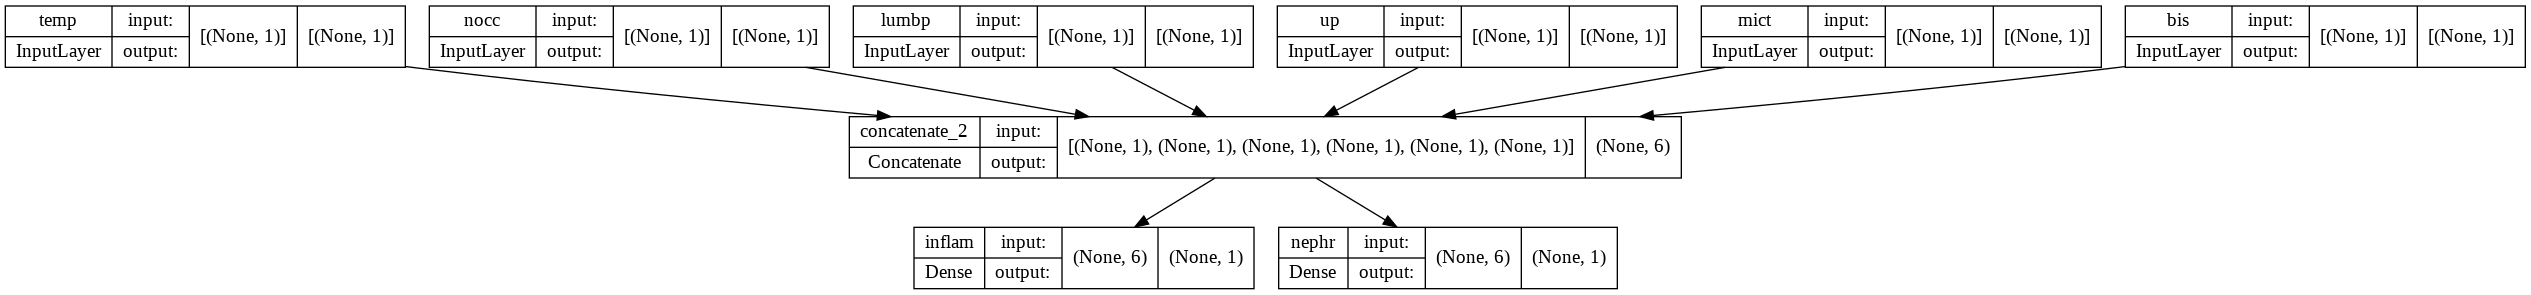

In [ ]:
# Display the multiple input/output model
tf.keras.utils.plot_model(model, 'multi_in_multi_out.png', show_shapes = True)


#### Compile the model

In [ ]:
# Compile the model
from tensorflow.keras import optimizers, losses
model.compile(optimizers.RMSprop(1e-3),
              loss = {'inflam': losses.binary_crossentropy,
                      'nephr': losses.binary_crossentropy
                      },
              metrics = ['acc'],
              loss_weights = [1., 0.2]
              )

#### Fit the model 

In [ ]:
#inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
#                'up': up_train, 'mict': mict_train, 'bis': bis_train}
#
#outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

inputs_train = [temp_train, nocc_train, lumbp_train,
                up_train, mict_train, bis_train
                ]
outputs_train = [inflam_train, nephr_train]

In [ ]:
# Train the model

history = model.fit(inputs_train, outputs_train,
                    epochs = 1000, 
                    batch_size = 128,
                    verbose = False
                    )

#### Plot the learning curves

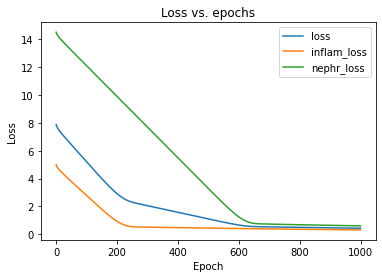

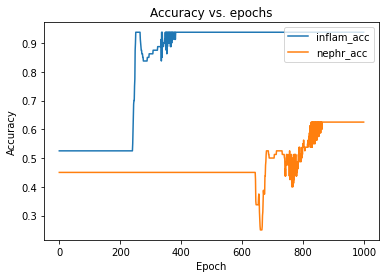

In [ ]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [ ]:
# Evaluate the model

inputs_test = [temp_test, nocc_test, lumbp_test,
                up_test, mict_test, bis_test
                ]
outputs_test = [inflam_test, nephr_test]

model.evaluate(inputs_test, outputs_test, verbose = 2)

2/2 - 0s - loss: 0.4602 - inflam_loss: 0.3474 - nephr_loss: 0.5643 - inflam_acc: 0.8750 - nephr_acc: 0.7500 - 260ms/epoch - 130ms/step


[0.460237592458725, 0.34738242626190186, 0.564275860786438, 0.875, 0.75]

***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [ ]:
import numpy as np
import tensorflow as tf

#### Create Variable objects

In [ ]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [ ]:
# Initialise a Variable value

tf.Variable(tf.constant(4.2, shape = (3,3)))

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[4.2, 4.2, 4.2],
       [4.2, 4.2, 4.2],
       [4.2, 4.2, 4.2]], dtype=float32)>

#### Use and modify Variable values

In [ ]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
# Increment the value of a Variable

v.assign_add(1)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>


In [ ]:
# Decrement the value of a Variable

v.assign_sub(1)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [ ]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [ ]:
# Obtain the value as a numpy array

x.numpy()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [ ]:
# Create a Tensor of type float32

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype = tf.float32)
print(x.dtype)

<dtype: 'float32'>


In [ ]:
# Create coefficients

coeffs = np.arange(16)

In [ ]:
# Initialise shapes

shape1 = [8,2]
shape2 = [4,4]
shape3 = [2,2,2,2]

In [ ]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]], shape=(2, 2, 2, 2), dtype=int64)


#### Useful Tensor operations

In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])

In [ ]:
# Get the rank of a Tensor

rank = tf.rank(t)

In [ ]:
# Display the rank

print("rank: ", rank)

rank:  tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
# Reshape a Tensor

t2 = tf.reshape(t, [8,10])

In [ ]:
# Display the new shape

print("t2.shape: ", t2.shape)

t2.shape:  (8, 10)


In [ ]:
# Create ones, zeros, identity and constant Tensors

ones = tf.ones(shape = (2,3))
zeros = tf.zeros(shape = (2,4))
eye = tf.eye(3)
tensor7 = tf.constant(7.0, shape = [2,2])

In [ ]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)

 Zeros:
  tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(2, 4), dtype=float32)

 Identity:
  tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)

 Tensor filled with 7:  tf.Tensor(
[[7. 7.]
 [7. 7.]], shape=(2, 2), dtype=float32)


In [ ]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [ ]:
# Concatentate two Tensors

concat0 = tf.concat((t1, t2), 0)
concat1 = tf.concat((t1, t2), 1)

In [ ]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [ ]:
# Expanding the rank of Tensors

t1 = tf.expand_dims(t, 0)
t2 = tf.expand_dims(t, 1)
t3 = tf.expand_dims(t, 3)

In [ ]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape:  (3, 1, 2, 4) 
 t3 shape:  (3, 2, 4, 1)


In [ ]:
# Squeezing redundant dimensions

t1 = tf.squeeze(t1, 0)
t2 = tf.squeeze(t2, 1)
t3 = tf.squeeze(t3, 3)

In [ ]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After squeezing:
 t1 shape:  (3, 2, 4) 
 t2 shape:  (3, 2, 4) 
 t3 shape:  (3, 2, 4)


In [ ]:
# Slicing a Tensor

x = tf.constant([1,2,3,4,5,6,7])
print(x[1:-3])
print(x[1:4])

tf.Tensor([2 3 4], shape=(3,), dtype=int32)
tf.Tensor([2 3 4], shape=(3,), dtype=int32)


#### Doing maths with Tensors

In [ ]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [ ]:
# Matrix multiplication

matmul_cd = tf.matmul(c, d)

In [ ]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)


 tf.matmul(c,d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [ ]:
# Elementwise operations

c_time_d = c*d
c_plus_d = c+d
c_minus_d = c-d
c_div_c = c/d

In [ ]:
# Display the results

print("\n c*d:\n", c_time_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[ 1.  2.]
 [inf  4.]], shape=(2, 2), dtype=float32)


In [ ]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [ ]:
# Absolute value of a Tensor

absx = tf.abs(x)

In [ ]:
# Power of a Tensor

powab = tf.pow(a,b)
powaa = tf.pow(a,a)

In [ ]:
# Display the results

print("\n ", absx)
print("\n ", powab)
print("\n", powaa)


  tf.Tensor(
[[7.11621388]
 [3.32777704]], shape=(2, 1), dtype=float64)

  tf.Tensor(
[[ 256 2187]
 [   9   27]], shape=(2, 2), dtype=int32)

 tf.Tensor(
[[ 4 27]
 [27 27]], shape=(2, 2), dtype=int32)


#### Randomly sampled constant tensors

In [ ]:
# Create a Tensor with samples from a Normal distribution

tn = tf.random.normal(shape = (2,2), mean = 1, stddev = 1.)
tn

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4889922 , -0.64788103],
       [ 1.7936739 ,  0.32861948]], dtype=float32)>

In [ ]:
# Create a Tensor with samples from a Uniform distribution

tu = tf.random.uniform(shape = (2,1), minval = 0, maxval = 10, dtype = 'int32')
tu

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[0],
       [5]], dtype=int32)>

In [ ]:
# Create a Tensor with samples from a Poisson distribution

tp = tf.random.poisson((2,2), 5)
tp

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 6.]], dtype=float32)>

In [ ]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c)

print("\n ", "tf.square(tn) =\n", d)
print("\n ", "tf.exp(d) =\n",e)
print("\n", "tf.cos(c) =\n", f)


  tf.square(tn) =
 tf.Tensor(
[[2.2170978  0.41974983]
 [3.2172658  0.10799076]], shape=(2, 2), dtype=float32)

  tf.exp(d) =
 tf.Tensor(
[[ 9.180648   1.5215808]
 [24.959784   1.1140375]], shape=(2, 2), dtype=float32)

 tf.cos(c) =
 tf.Tensor(
[[ 0.5403023  -0.41614684]
 [-0.9899925  -0.6536436 ]], shape=(2, 2), dtype=float32)


***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [ ]:
# Load the VGG19 model
#from tensorflow.keras.models import load_model
#vgg_model = load_model('models/Vgg19.h5')

from tensorflow.keras.applications import VGG19
vgg_model = VGG19()

574726144/574710816 [==============================] - 8s 0us/step


In [ ]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### Build a model to access the layer outputs

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
# Build a model that returns the layer outputs

layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs = vgg_input, outputs = layer_outputs)

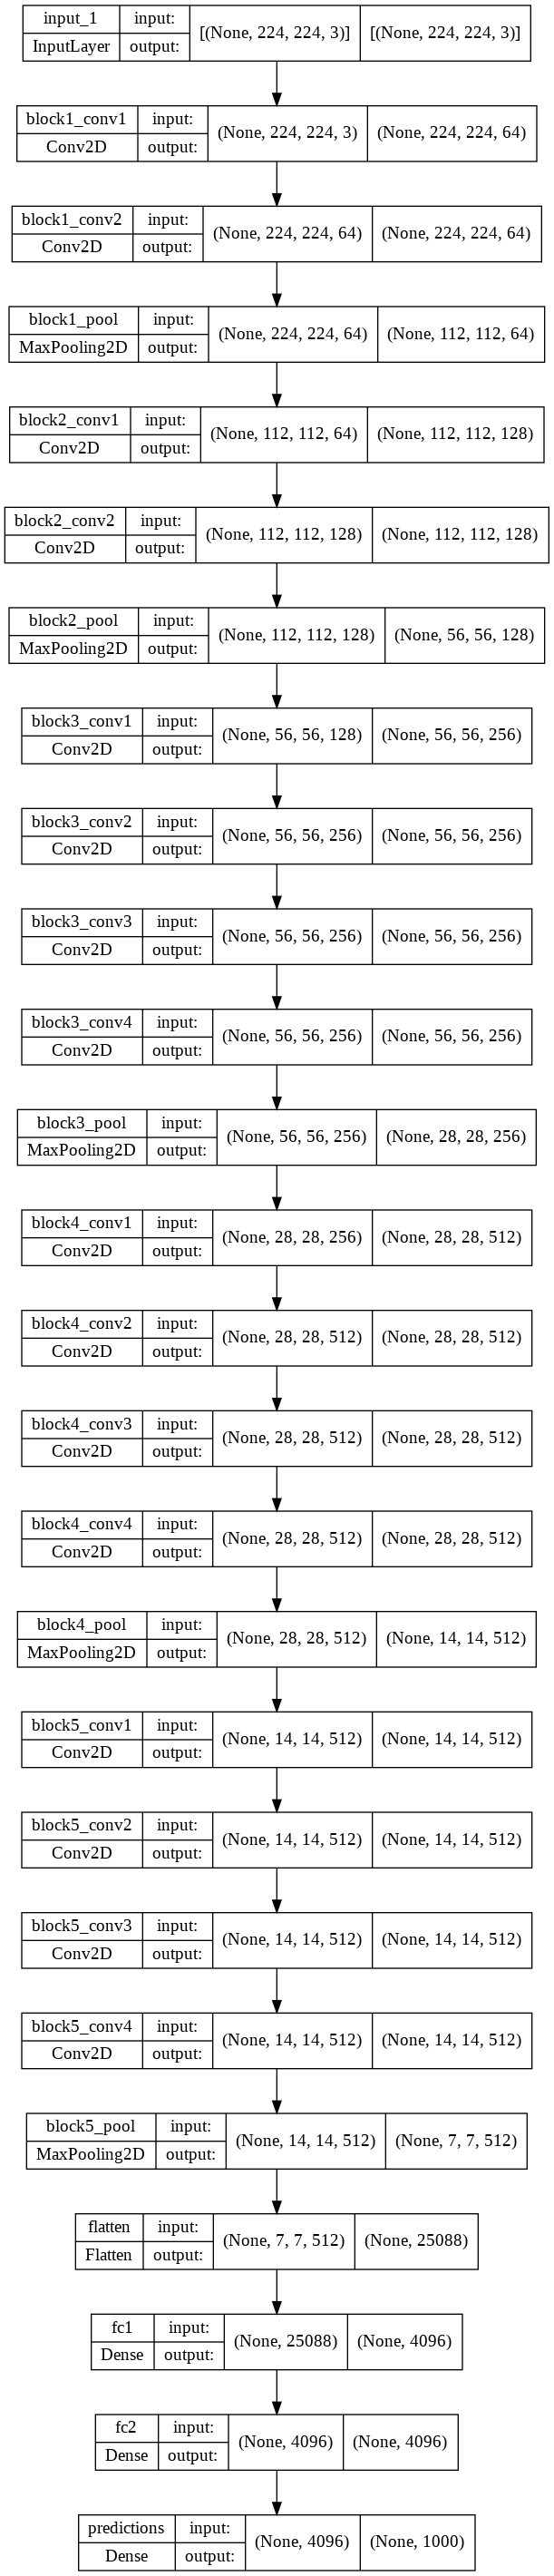

In [ ]:
# Plot the model
import tensorflow as tf
tf.keras.utils.plot_model(features, 'vgg19_model.png', show_shapes = True)

In [ ]:
# Test the model on a random input

img = np.random.random((1, 224, 224, 3)).astype('float32')
extracted_features = features(img)

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

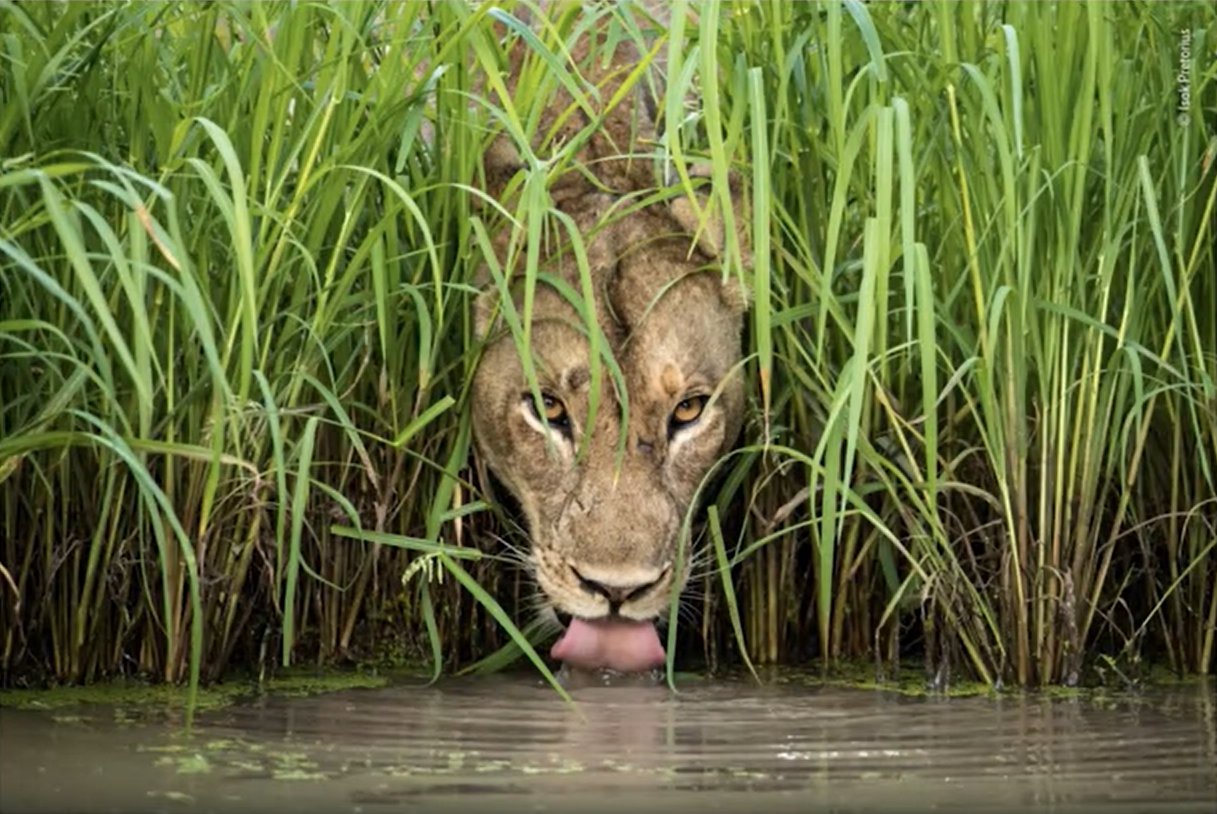

In [ ]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('cool_cat.png'))

#### Visualise network features from the input image

In [ ]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = 'cool_cat.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
# Extract the features

extracted_features = features(x)


 f1.shape:  (1, 224, 224, 3)


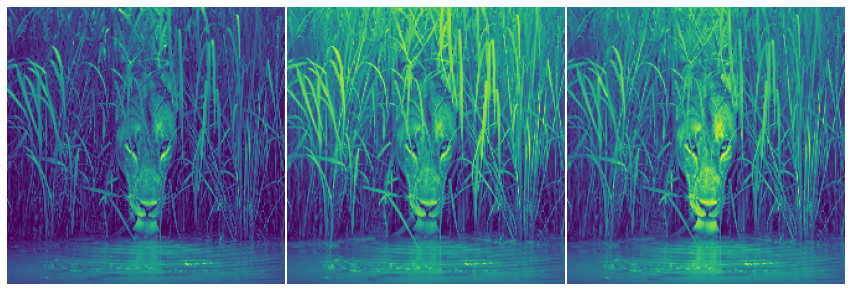

In [ ]:
# Visualise the input channels

f1 = extracted_features[0]
print('\n f1.shape: ', f1.shape)

imgs = f1[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(3):
  ax = plt.subplot(1, 3, n+1)
  plt.imshow(imgs[:, :, n])
  plt.axis('off')
plt.subplots_adjust(wspace = 0.01, hspace = 0.01)


 f2.shape:  (1, 224, 224, 64)


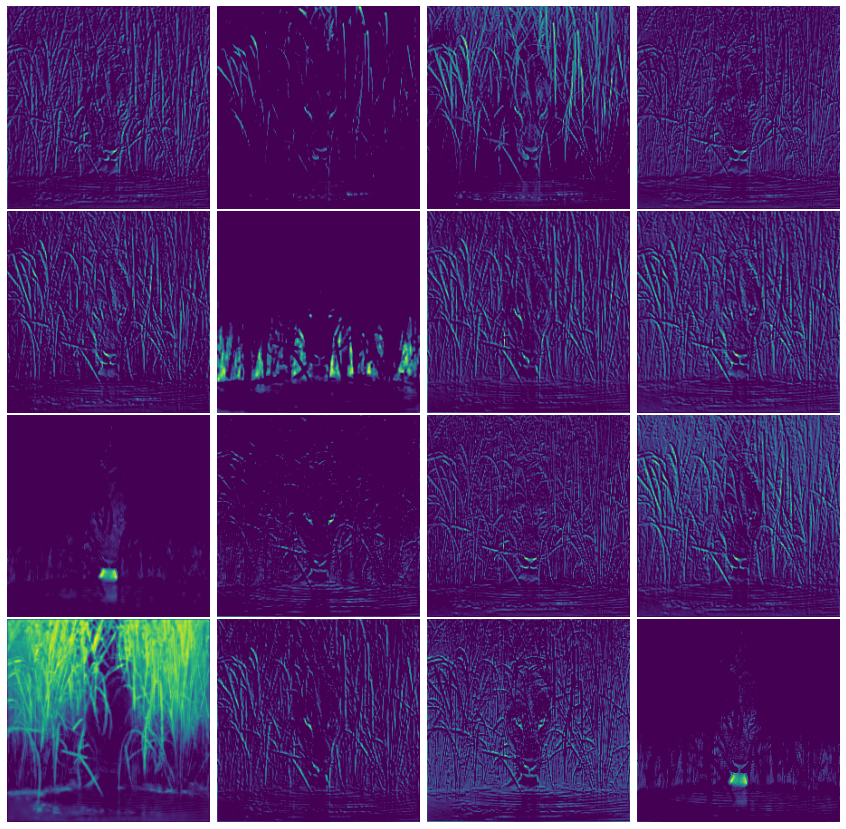

In [ ]:
# Visualise some features in the first hidden layer

f2 = extracted_features[1]
print('\n f2.shape: ', f2.shape)

imgs = f2[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(16):
  ax = plt.subplot(4, 4, n+1)
  plt.imshow(imgs[:, :, n])
  plt.axis('off')
plt.subplots_adjust(wspace = 0.01, hspace = 0.01)

In [ ]:
# Build a model to extract features by layer name

extracted_features_block1_pool = Model(inputs = features.input,
                                       outputs = features.get_layer('block1_pool').output)
block1_pool_features = extracted_features_block1_pool.predict(x)

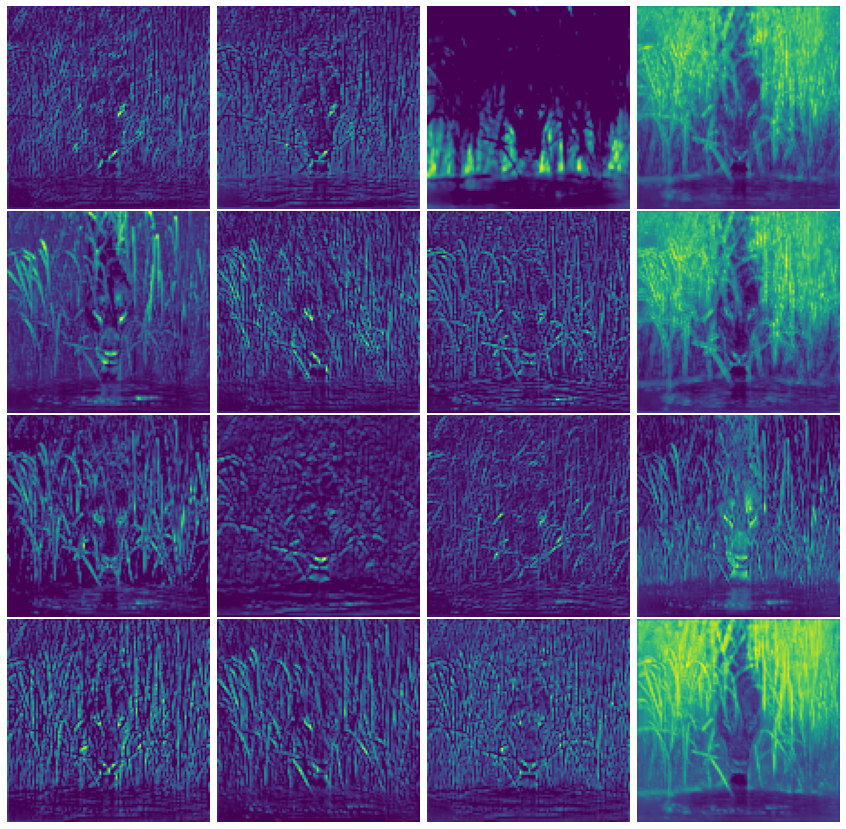

In [ ]:
# Visualise some features from the extracted layer output

imgs = block1_pool_features[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(16):
  ax = plt.subplot(4, 4, n+1)
  plt.imshow(imgs[:, :, n])
  plt.axis('off')
plt.subplots_adjust(wspace = 0.01, hspace = 0.01)

In [ ]:
# Extract features from a layer deeper in the network

extracted_features_block5_conv4 = Model(inputs = features.input,
                                       outputs = features.get_layer('block5_conv4').output)
block5_conv4_features = extracted_features_block5_conv4.predict(x)

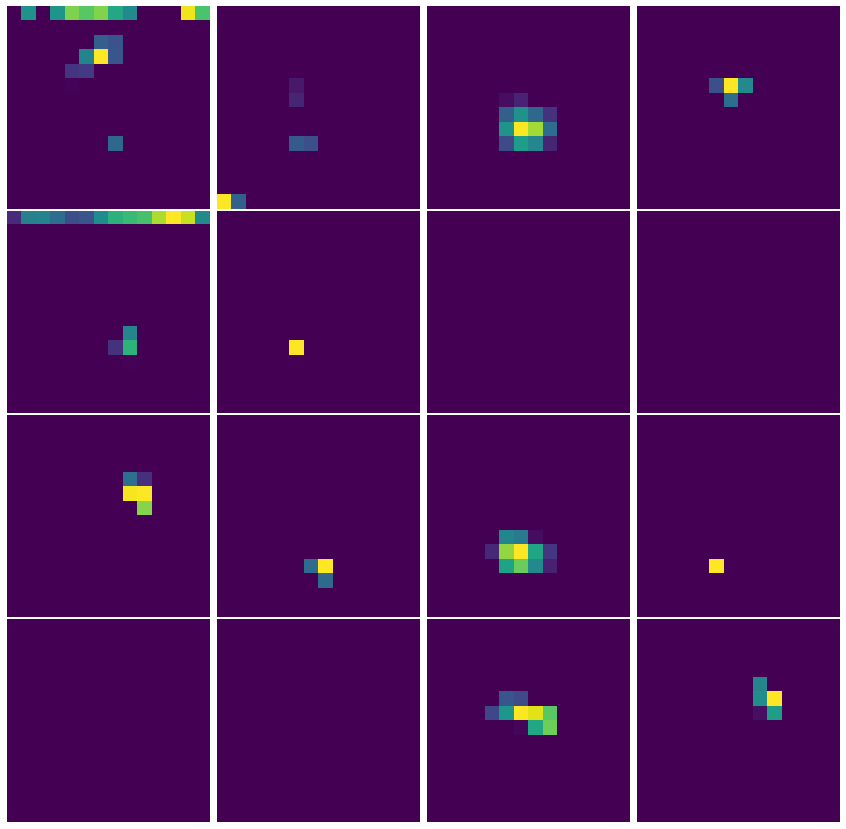

In [ ]:
# Visualise some features from the extracted layer output

imgs = block5_conv4_features[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(16):
  ax = plt.subplot(4, 4, n+1)
  plt.imshow(imgs[:, :, n])
  plt.axis('off')
plt.subplots_adjust(wspace = 0.01, hspace = 0.01)

***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [ ]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
# Display the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [ ]:
def get_weights(model):
  return [e.weights[0].numpy() for e in model.layers]

def get_biases(model):
  return [e.bias[0].numpy() for e in model.layers]

def plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers):
  plt.figure(figsize=(8,8))
  for n in range(3):
    delta_l = W1_layers[n] - W0_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
  plt.colorbar()
  plt.suptitle('Weight matrices variation');

In [ ]:
# Retrieve the weights and biases

W0_layers = get_weights(model)
b0_layers = get_biases(model)

print('\nW0_layers = \n', W0_layers)
print('\nb0_layers = \n', b0_layers)


W0_layers = 
 [array([[ 0.12966341, -0.03070779, -0.19712333, -0.03733919],
       [ 0.05666056, -0.11745876, -0.06254929, -0.05142814],
       [ 0.15376246, -0.03406427, -0.12188289,  0.00595135],
       [ 0.13504487, -0.06717119, -0.13250348, -0.08064435]],
      dtype=float32), array([[-0.67228866, -0.6563354 ],
       [-0.05712698,  0.22085585],
       [ 0.73717517, -0.02608481],
       [-0.04900521, -0.86429065]], dtype=float32), array([[-0.8638196 ,  0.382185  , -0.84643584,  0.28656372],
       [ 0.5064528 ,  0.6397531 ,  0.16345549,  0.41344833]],
      dtype=float32)]

b0_layers = 
 [1.1565485, 0.85164696, 0.14416432]


In [ ]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_biases(model)

print('\nW0_layers = \n', W1_layers)
print('\nb0_layers = \n', b1_layers)


W0_layers = 
 [array([[ 0.22149321,  0.07192346, -0.2894472 ,  0.06516339],
       [-0.0928757 , -0.2819498 ,  0.08781188, -0.21564049],
       [ 0.25402448,  0.07912635, -0.22274391,  0.11898208],
       [-0.00379392, -0.22018433,  0.00706629, -0.23338333]],
      dtype=float32), array([[-0.690369  , -0.6563354 ],
       [-0.10832795,  0.22085585],
       [ 0.7682122 , -0.02608481],
       [-0.09389607, -0.86429065]], dtype=float32), array([[-0.921589  ,  0.5043333 , -0.9318607 ,  0.26499525],
       [ 0.5064528 ,  0.6397531 ,  0.16345549,  0.41344833]],
      dtype=float32)]

b0_layers = 
 [1.1604819, 0.84763914, 0.18680331]


Layer 0: bias variation:  0.0039334297
Layer 1: bias variation:  0.0040078163
Layer 2: bias variation:  0.042638987


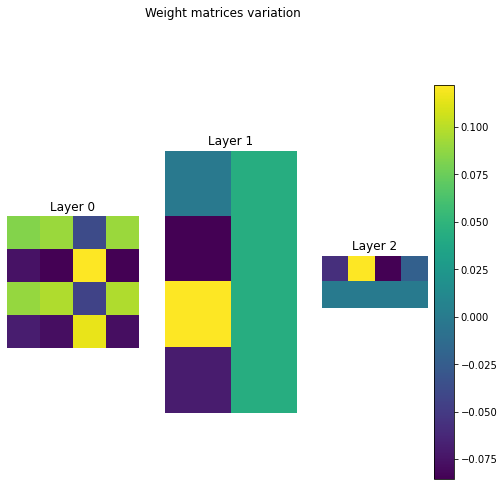

In [ ]:
# Plot the variation

plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers)

#### Freeze layers at build time

In [ ]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [ ]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [ ]:
# Build the model

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones', trainable = False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
# Count the trainable and non trainable variables after the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [ ]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [ ]:
# Retrieve weights and biases

W0_layers = get_weights(model)
b0_layers = get_biases(model)

print('\nW0_layers = \n', W0_layers)
print('\nb0_layers = \n', b0_layers)


W0_layers = 
 [array([[-0.01834574,  0.02446249, -0.02774675,  0.00478518],
       [-0.01513984,  0.00314933,  0.04421972, -0.04096402],
       [-0.00285117,  0.03544823, -0.03552389, -0.00740563],
       [-0.03937321,  0.03228356,  0.00945684, -0.04473591]],
      dtype=float32), array([[ 0.76895344, -0.5325752 ],
       [-0.03199216, -0.54852   ],
       [ 0.41529116, -0.7055555 ],
       [-0.7203742 ,  0.60231876]], dtype=float32), array([[-0.18473911, -0.10306311,  0.4313078 ,  0.17016912],
       [-0.69869757,  0.65929484, -0.4775951 ,  0.6650307 ]],
      dtype=float32)]

b0_layers = 
 [1.0, 1.0, 0.0]


In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_biases(model)

print('\nW1_layers = \n', W1_layers)
print('\nb1_layers = \n', b1_layers)


W1_layers = 
 [array([[-0.01834574,  0.02446249, -0.02774675,  0.00478518],
       [-0.01513984,  0.00314933,  0.04421972, -0.04096402],
       [-0.00285117,  0.03544823, -0.03552389, -0.00740563],
       [-0.03937321,  0.03228356,  0.00945684, -0.04473591]],
      dtype=float32), array([[ 0.6565304 , -0.5325752 ],
       [-0.1443641 , -0.54852   ],
       [ 0.30131406, -0.7055555 ],
       [-0.8330272 ,  0.60231876]], dtype=float32), array([[-0.07500234, -0.00135516,  0.3258315 ,  0.13341814],
       [-0.69869757,  0.65929484, -0.4775951 ,  0.6650307 ]],
      dtype=float32)]

b1_layers = 
 [1.0, 0.8871053, 0.123742945]


Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.112894714
Layer 2: bias variation:  0.123742945


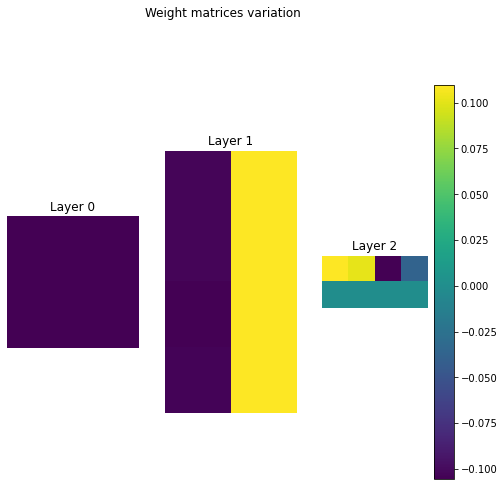

In [ ]:
# Plot the variation

plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers)

#### Freeze layers of a pre-built model

In [ ]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [ ]:
# Freeze the second layer

model.layers[1].trainable = False

In [ ]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases

W2_layers = get_weights(model)
b2_layers = get_biases(model)

print('\nW2_layers = \n', W2_layers)
print('\nb2_layers = \n', b2_layers)


W2_layers = 
 [array([[-0.01834574,  0.02446249, -0.02774675,  0.00478518],
       [-0.01513984,  0.00314933,  0.04421972, -0.04096402],
       [-0.00285117,  0.03544823, -0.03552389, -0.00740563],
       [-0.03937321,  0.03228356,  0.00945684, -0.04473591]],
      dtype=float32), array([[ 0.6565304 , -0.5325752 ],
       [-0.1443641 , -0.54852   ],
       [ 0.30131406, -0.7055555 ],
       [-0.8330272 ,  0.60231876]], dtype=float32), array([[-0.05111271,  0.03668858,  0.27577022,  0.11364175],
       [-0.69869757,  0.65929484, -0.4775951 ,  0.6650307 ]],
      dtype=float32)]

b2_layers = 
 [1.0, 0.8871053, 0.15420967]


Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.030466728


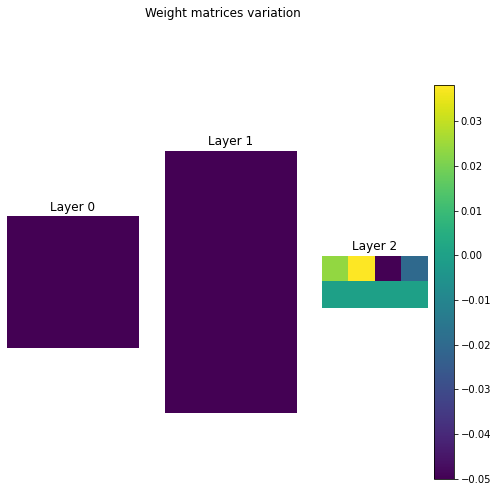

In [ ]:
# Plot the variation

plot_delta_weights(W1_layers, W2_layers, b1_layers, b2_layers)